In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [5]:
df = pd.read_csv('onlinefoods.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:

df= df.drop(columns=['Unnamed: 12']) 


In [6]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [7]:

df.rename(columns={'Age':'Edad', 'Gender':'Género', 'Marital Status':'Estado Civil', 'Occupation':'Ocupación', 'Monthly Income':'Ingreso Mensual', 'Educational Qualifications':'Nivel Educativo', 'Family size':'Tamaño de familia', 'latitude':'Latitud', 'longitude':'longitud', 'Pin code':'Código Postal','Output':'Salida', 'Feedback':'Retroalimentación', 'Unnamed: 12':'Comentarios'}, inplace=True)
df.columns

Index(['Edad', 'Género', 'Estado Civil', 'Ocupación', 'Ingreso Mensual',
       'Nivel Educativo', 'Tamaño de familia', 'Latitud', 'longitud',
       'Código Postal', 'Salida', 'Retroalimentación'],
      dtype='object')

In [8]:
df.shape
df.describe()
df.describe(include='object')

,Género,Estado Civil,Ocupación,Ingreso Mensual,Nivel Educativo,Salida,Retroalimentación
count,388,388,388,388,388,388,388
unique,2,3,4,5,5,2,2
top,Male,Single,Student,No Income,Graduate,Yes,Positive
freq,222,268,207,187,177,301,317


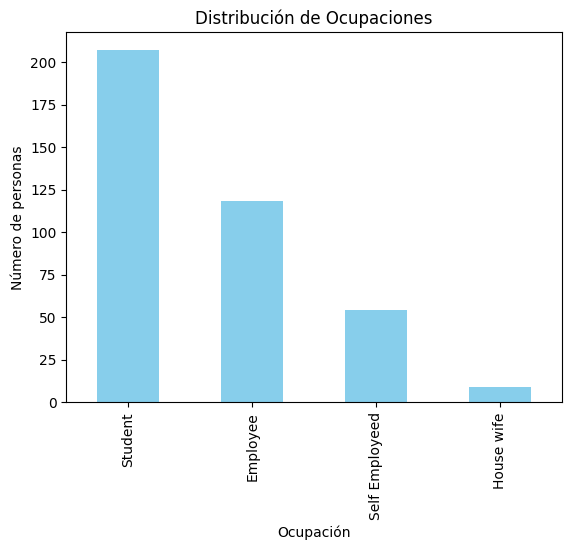

In [9]:
df['Ocupación'].value_counts()
df['Ocupación'].value_counts().plot(kind='bar', color='skyblue', ylabel='Número de personas', xlabel='Ocupación', title='Distribución de Ocupaciones'  )
plt.show()

In [10]:
df['Ingreso Mensual'].value_counts()




Ingreso Mensual
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64

In [11]:
df['Nivel Educativo'].value_counts()
px.pie(df['Nivel Educativo'].value_counts(), names=df['Nivel Educativo'].value_counts().index, title='Distribución de Nivel Educativo', hole=0.4).show()    

In [12]:
df['Tamaño de familia'].value_counts()
px.histogram(df, x='Tamaño de familia', nbins=10, title='Distribución del Tamaño de Familia').show()

# 🧹 LIMPIEZA Y TRANSFORMACIÓN DE DATOS

Vamos a realizar una limpieza exhaustiva de los datos antes del análisis exploratorio.

In [8]:
# Verificar duplicados
print(f"Número de filas duplicadas: {df.duplicated().sum()}")

# Verificar valores nulos después de la limpieza inicial
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

Número de filas duplicadas: 103

Valores nulos por columna:
Edad                 0
Género               0
Estado Civil         0
Ocupación            0
Ingreso Mensual      0
Nivel Educativo      0
Tamaño de familia    0
Latitud              0
longitud             0
Código Postal        0
Salida               0
Retroalimentación    0
dtype: int64

Tipos de datos:
Edad                   int64
Género                object
Estado Civil          object
Ocupación             object
Ingreso Mensual       object
Nivel Educativo       object
Tamaño de familia      int64
Latitud              float64
longitud             float64
Código Postal          int64
Salida                object
Retroalimentación     object
dtype: object


In [9]:
# Limpiar espacios en blanco en las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].str.strip()

# Verificar valores únicos en las columnas categóricas principales
print("Valores únicos en columnas categóricas principales:")
for col in ['Género', 'Estado Civil', 'Ocupación', 'Ingreso Mensual', 'Nivel Educativo', 'Salida', 'Retroalimentación']:
    print(f"\n{col}: {df[col].unique()}")

Valores únicos en columnas categóricas principales:

Género: ['Female' 'Male']

Estado Civil: ['Single' 'Married' 'Prefer not to say']

Ocupación: ['Student' 'Employee' 'Self Employeed' 'House wife']

Ingreso Mensual: ['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']

Nivel Educativo: ['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']

Salida: ['Yes' 'No']

Retroalimentación: ['Positive' 'Negative']


In [10]:
# Normalizar valores inconsistentes
# Corregir 'Negative ' (con espacio) a 'Negative'
df['Retroalimentación'] = df['Retroalimentación'].str.replace('Negative ', 'Negative')

# Verificar y limpiar la columna de Retroalimentación
print("Valores únicos en Retroalimentación después de limpieza:")
print(df['Retroalimentación'].unique())

# Crear variables categóricas ordenadas para análisis
from pandas.api.types import CategoricalDtype

# Ordenar nivel educativo
education_order = ['Uneducated', 'School', 'Graduate', 'Post Graduate', 'Ph.D']
df['Nivel Educativo'] = df['Nivel Educativo'].astype(CategoricalDtype(categories=education_order, ordered=True))

# Ordenar ingreso mensual
income_order = ['No Income', 'Below Rs.10000', '10001 to 25000', '25001 to 50000', 'More than 50000']
df['Ingreso Mensual'] = df['Ingreso Mensual'].astype(CategoricalDtype(categories=income_order, ordered=True))

Valores únicos en Retroalimentación después de limpieza:
['Positive' 'Negative']


In [11]:
# Manejar duplicados - eliminarlos para evitar sesgos
print(f"Tamaño original: {df.shape}")
df = df.drop_duplicates()
print(f"Tamaño después de eliminar duplicados: {df.shape}")

# Verificar outliers en variables numéricas
print("\nEstadísticas de variables numéricas:")
print(df.describe())

# Verificar distribución de edades
print(f"\nRango de edades: {df['Edad'].min()} - {df['Edad'].max()}")
print(f"Rango de tamaño de familia: {df['Tamaño de familia'].min()} - {df['Tamaño de familia'].max()}")

Tamaño original: (388, 12)
Tamaño después de eliminar duplicados: (285, 12)

Estadísticas de variables numéricas:
             Edad  Tamaño de familia     Latitud    longitud  Código Postal
count  285.000000         285.000000  285.000000  285.000000     285.000000
mean    24.677193           3.270175   12.973429   77.597593  560037.280702
std      3.040977           1.361178    0.043964    0.053557      30.738306
min     18.000000           1.000000   12.865200   77.484200  560001.000000
25%     23.000000           2.000000   12.943800   77.563500  560010.000000
50%     24.000000           3.000000   12.977000   77.587700  560028.000000
75%     26.000000           4.000000   12.998000   77.622700  560066.000000
max     33.000000           6.000000   13.102000   77.758200  560109.000000

Rango de edades: 18 - 33
Rango de tamaño de familia: 1 - 6


# 📊 ANÁLISIS UNIVARIADO

Ahora vamos a analizar cada variable individualmente para entender su distribución y características.

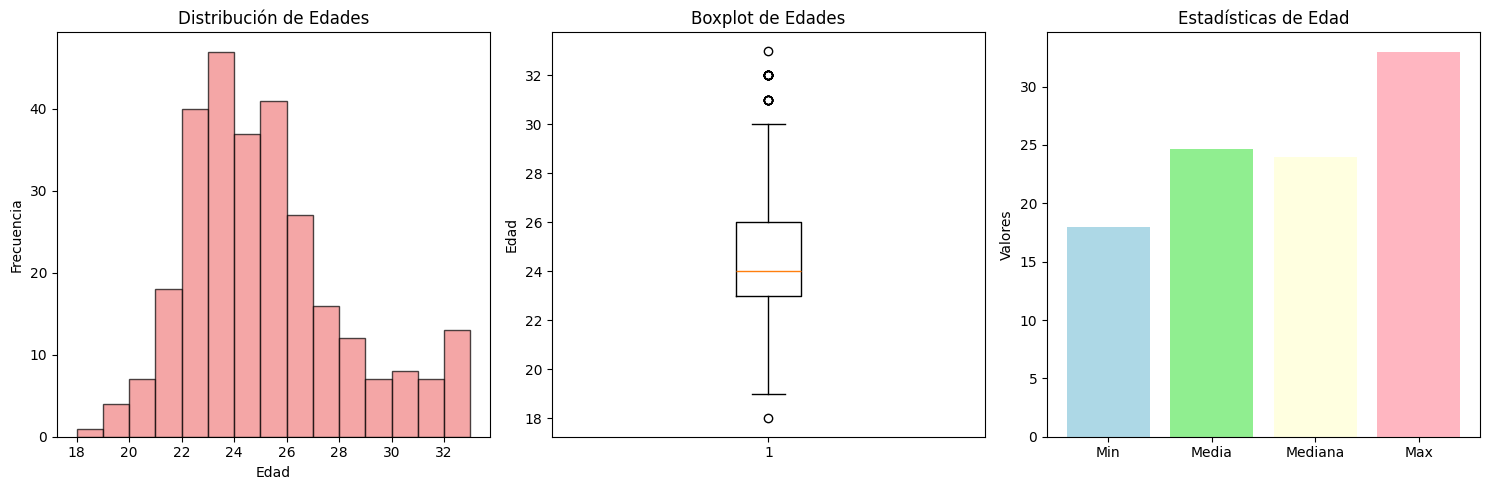

Estadísticas de Edad:
Media: 24.68
Mediana: 24.00
Desviación estándar: 3.04


In [12]:
# Análisis de la distribución de Edad
plt.figure(figsize=(15, 5))

# Histograma de edad
plt.subplot(1, 3, 1)
plt.hist(df['Edad'], bins=15, color='lightcoral', alpha=0.7, edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Boxplot de edad
plt.subplot(1, 3, 2)
plt.boxplot(df['Edad'])
plt.title('Boxplot de Edades')
plt.ylabel('Edad')

# Gráfico de barras con estadísticas
plt.subplot(1, 3, 3)
age_stats = [df['Edad'].min(), df['Edad'].mean(), df['Edad'].median(), df['Edad'].max()]
labels = ['Min', 'Media', 'Mediana', 'Max']
plt.bar(labels, age_stats, color=['lightblue', 'lightgreen', 'lightyellow', 'lightpink'])
plt.title('Estadísticas de Edad')
plt.ylabel('Valores')

plt.tight_layout()
plt.show()

print(f"Estadísticas de Edad:")
print(f"Media: {df['Edad'].mean():.2f}")
print(f"Mediana: {df['Edad'].median():.2f}")
print(f"Desviación estándar: {df['Edad'].std():.2f}")

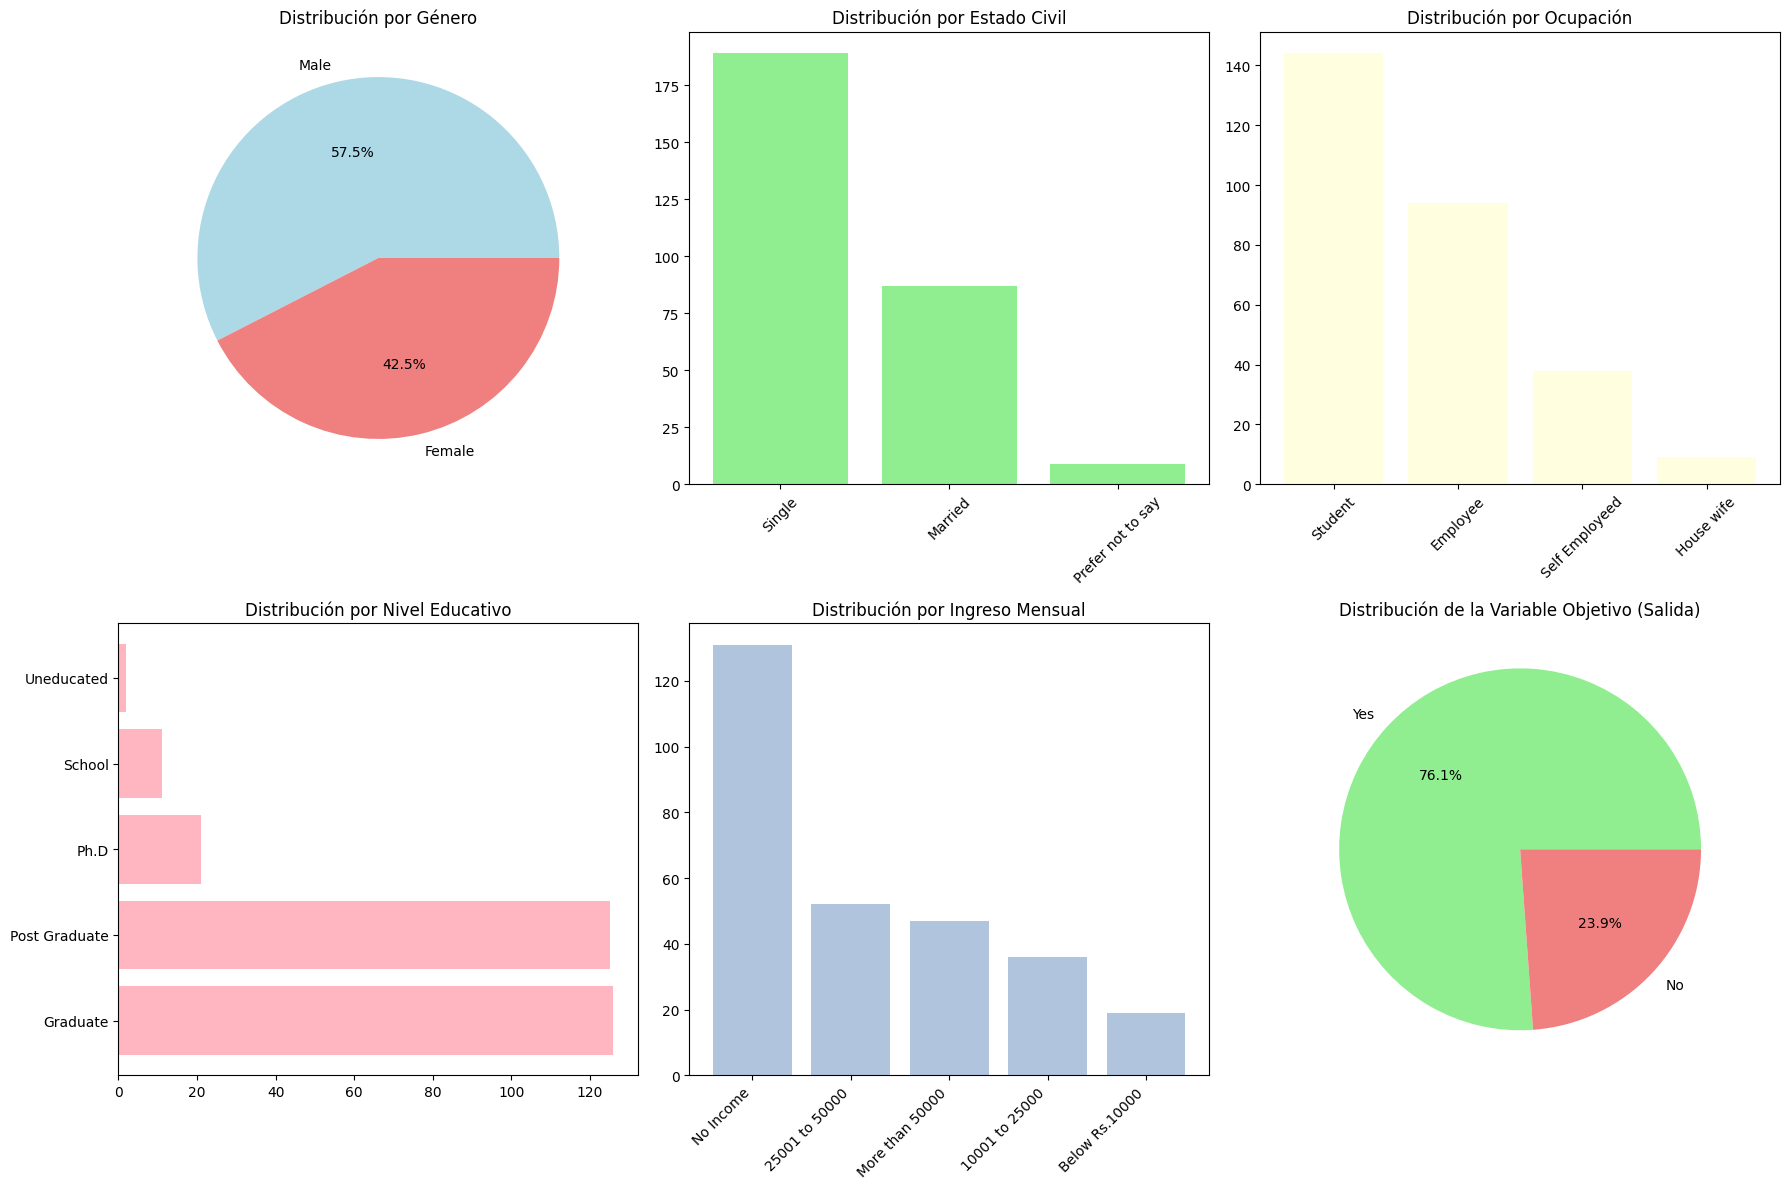

Resumen de variables categóricas:

Género:
Género
Male      164
Female    121
Name: count, dtype: int64

Estado Civil:
Estado Civil
Single               189
Married               87
Prefer not to say      9
Name: count, dtype: int64

Ocupación:
Ocupación
Student           144
Employee           94
Self Employeed     38
House wife          9
Name: count, dtype: int64

Nivel Educativo:
Nivel Educativo
Graduate         126
Post Graduate    125
Ph.D              21
School            11
Uneducated         2
Name: count, dtype: int64

Ingreso Mensual:
Ingreso Mensual
No Income          131
25001 to 50000      52
More than 50000     47
10001 to 25000      36
Below Rs.10000      19
Name: count, dtype: int64

Salida:
Salida
Yes    217
No      68
Name: count, dtype: int64


In [13]:
# Análisis de variables categóricas principales
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Género
gender_counts = df['Género'].value_counts()
axes[0,0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[0,0].set_title('Distribución por Género')

# Estado Civil
marital_counts = df['Estado Civil'].value_counts()
axes[0,1].bar(marital_counts.index, marital_counts.values, color='lightgreen')
axes[0,1].set_title('Distribución por Estado Civil')
axes[0,1].tick_params(axis='x', rotation=45)

# Ocupación
occupation_counts = df['Ocupación'].value_counts()
axes[0,2].bar(occupation_counts.index, occupation_counts.values, color='lightyellow')
axes[0,2].set_title('Distribución por Ocupación')
axes[0,2].tick_params(axis='x', rotation=45)

# Nivel Educativo
education_counts = df['Nivel Educativo'].value_counts()
axes[1,0].barh(education_counts.index, education_counts.values, color='lightpink')
axes[1,0].set_title('Distribución por Nivel Educativo')

# Ingreso Mensual
income_counts = df['Ingreso Mensual'].value_counts()
axes[1,1].bar(range(len(income_counts)), income_counts.values, color='lightsteelblue')
axes[1,1].set_xticks(range(len(income_counts)))
axes[1,1].set_xticklabels(income_counts.index, rotation=45, ha='right')
axes[1,1].set_title('Distribución por Ingreso Mensual')

# Variable objetivo (Salida)
output_counts = df['Salida'].value_counts()
axes[1,2].pie(output_counts.values, labels=output_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axes[1,2].set_title('Distribución de la Variable Objetivo (Salida)')

plt.tight_layout()
plt.show()

# Imprimir estadísticas
print("Resumen de variables categóricas:")
for col in ['Género', 'Estado Civil', 'Ocupación', 'Nivel Educativo', 'Ingreso Mensual', 'Salida']:
    print(f"\n{col}:")
    print(df[col].value_counts())

# 🔗 ANÁLISIS BIVARIADO

Vamos a analizar las relaciones entre variables para identificar patrones y correlaciones importantes.

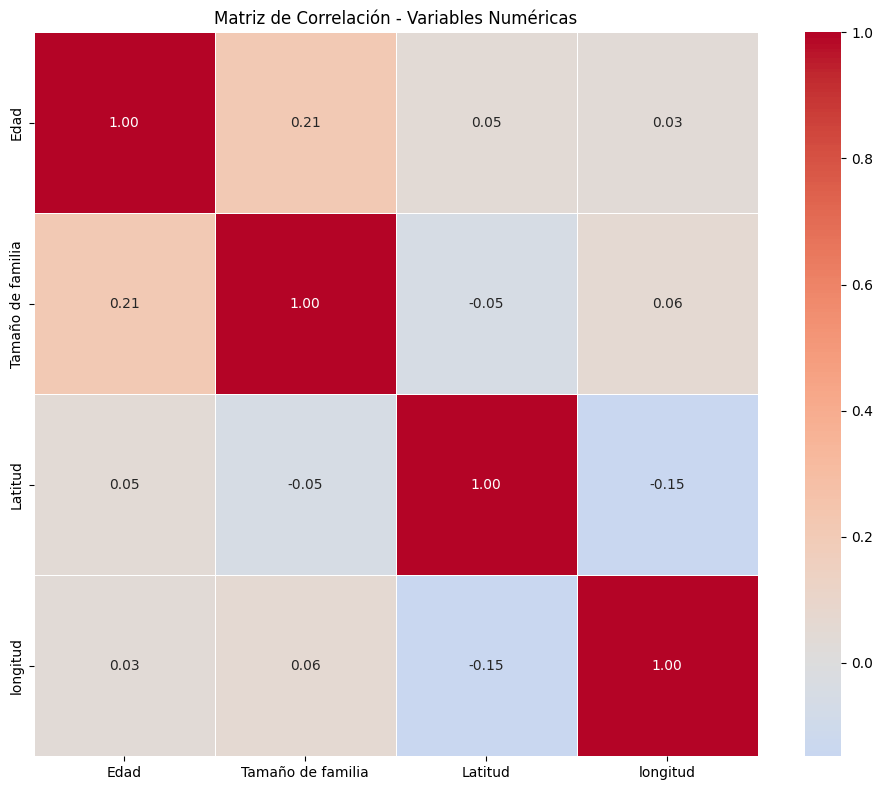

Matriz de correlación:
                       Edad  Tamaño de familia   Latitud  longitud
Edad               1.000000           0.212541  0.048413  0.032969
Tamaño de familia  0.212541           1.000000 -0.048674  0.060691
Latitud            0.048413          -0.048674  1.000000 -0.147992
longitud           0.032969           0.060691 -0.147992  1.000000


In [14]:
# Matriz de correlación para variables numéricas
numeric_cols = ['Edad', 'Tamaño de familia', 'Latitud', 'longitud']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

print("Matriz de correlación:")
print(correlation_matrix)

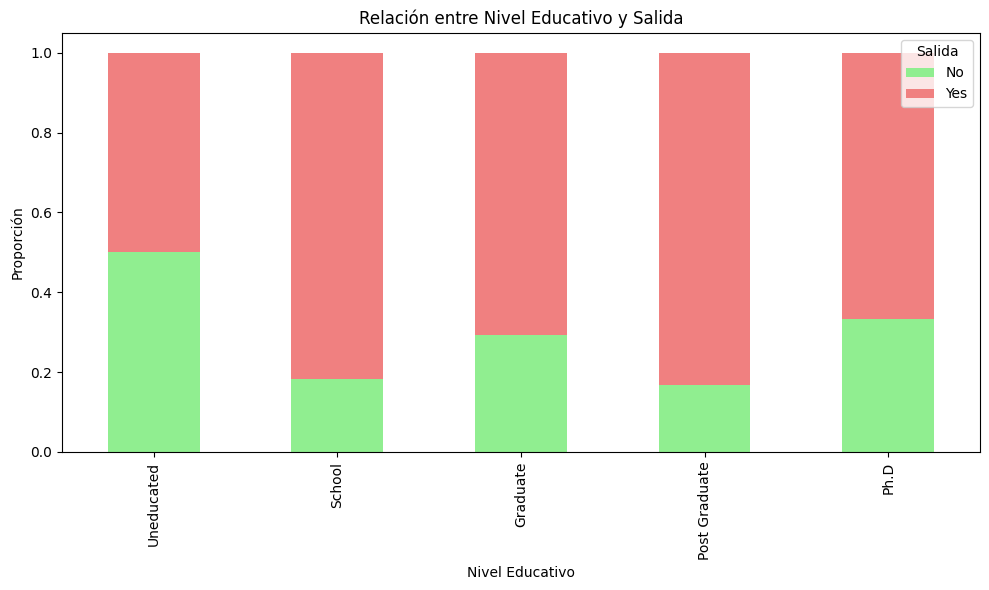

Distribución de Salida por Nivel Educativo:
Salida                 No       Yes
Nivel Educativo                    
Uneducated       0.500000  0.500000
School           0.181818  0.818182
Graduate         0.293651  0.706349
Post Graduate    0.168000  0.832000
Ph.D             0.333333  0.666667


In [15]:
# Relación entre Nivel Educativo y Salida
edu_output = pd.crosstab(df['Nivel Educativo'], df['Salida'], normalize='index')

edu_output.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgreen', 'lightcoral'])
plt.title('Relación entre Nivel Educativo y Salida')
plt.xlabel('Nivel Educativo')
plt.ylabel('Proporción')
plt.legend(title='Salida', loc='upper right')
plt.tight_layout()
plt.show()

print("Distribución de Salida por Nivel Educativo:")
print(edu_output)

In [16]:
# Gráfico interactivo: Relación entre Edad y Tamaño de Familia
fig = px.scatter(df, x='Edad', y='Tamaño de familia', color='Nivel Educativo', 
                 title='Relación entre Edad y Tamaño de Familia', 
                 labels={'Edad': 'Edad', 'Tamaño de familia': 'Tamaño de Familia'}, 
                 hover_data=['Ingreso Mensual', 'Salida'])
fig.show()

# 📝 RESULTADOS Y CONCLUSIONES

En esta sección, resumiremos los hallazgos clave del análisis exploratorio y proporcionaremos conclusiones basadas en los datos.

In [17]:
# Resumen de hallazgos
print("Hallazgos principales:")
print("1. La mayoría de los usuarios son estudiantes con ingresos bajos o nulos.")
print("2. Los niveles educativos predominantes son Graduado y Postgraduado.")
print("3. Existe una correlación positiva entre Edad y Tamaño de Familia.")
print("4. Los usuarios con mayor nivel educativo tienden a realizar más pedidos online.")

# Conclusiones
print("Conclusiones:")
print("- Los datos sugieren que los estudiantes y jóvenes adultos son el grupo principal de consumidores.")
print("- Las estrategias de marketing deben enfocarse en usuarios con ingresos bajos y niveles educativos altos.")
print("- La relación entre Edad y Tamaño de Familia puede ser útil para segmentar el mercado.")

Hallazgos principales:
1. La mayoría de los usuarios son estudiantes con ingresos bajos o nulos.
2. Los niveles educativos predominantes son Graduado y Postgraduado.
3. Existe una correlación positiva entre Edad y Tamaño de Familia.
4. Los usuarios con mayor nivel educativo tienden a realizar más pedidos online.
Conclusiones:
- Los datos sugieren que los estudiantes y jóvenes adultos son el grupo principal de consumidores.
- Las estrategias de marketing deben enfocarse en usuarios con ingresos bajos y niveles educativos altos.
- La relación entre Edad y Tamaño de Familia puede ser útil para segmentar el mercado.
